### Importação dos dados



In [88]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [89]:
import pandas as pd

# Função que retorna os links das lojas
def links():
    return {
        "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
        "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
        "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
        "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
    }

# Obtendo os links
urls = links()

# Dicionário para armazenar faturamento por loja
faturamento_lojas = {}

# Loop para ler os arquivos CSV e calcular o faturamento total
for nome_loja, url in urls.items():
    try:
        loja = pd.read_csv(url)
        loja.columns = loja.columns.str.strip()  # Remove espaços em branco dos nomes das colunas

        if "Preço" in loja.columns:
            faturamento_total = loja["Preço"].sum()
            faturamento_lojas[nome_loja] = faturamento_total
        else:
            print(f"{nome_loja}: Coluna 'Preço' não encontrada.")

    except Exception as e:
        print(f"Erro ao processar {nome_loja}: {e}")

# Exibindo o faturamento de cada loja
print("\nFaturamento Total das Lojas:")
print("=" * 30)
for loja, faturamento in faturamento_lojas.items():
    print(f"{loja}: {faturamento:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))



Faturamento Total das Lojas:
Loja 1: 1.534.509,12
Loja 2: 1.488.459,06
Loja 3: 1.464.025,03
Loja 4: 1.384.497,58


# 2. Vendas por Categoria


In [90]:
import pandas as pd

urls = links()

# Processando cada loja
for nome_loja, url in urls.items():
    try:
        loja = pd.read_csv(url)

        # Padronizando nomes das colunas (removendo espaços extras)
        loja.columns = loja.columns.str.strip()

        # Verificando o nome correto da coluna de categoria
        coluna_categoria = "Categoria" if "Categoria" in loja.columns else "Categoria do Produto"

        # Removendo valores nulos
        loja = loja.dropna(subset=[coluna_categoria])

        # Contando número de vendas por categoria
        categoria_contagem = loja[coluna_categoria].value_counts().reset_index()
        categoria_contagem.columns = [coluna_categoria, "Quantidade Vendida"]

        # Ordenando por quantidade vendida
        categoria_contagem = categoria_contagem.sort_values(by="Quantidade Vendida", ascending=False).reset_index(drop=True)

        # Adicionando a coluna "Posição"
        categoria_contagem.insert(0, "Posição", range(1, len(categoria_contagem) + 1))

        # Exibindo o resultado
        print(f"\n{nome_loja} - Categorias mais populares:")
        print(categoria_contagem[["Posição", coluna_categoria, "Quantidade Vendida"]].to_string(index=False))

    except Exception as e:
        print(f"Erro ao processar {nome_loja}: {e}")



Loja 1 - Categorias mais populares:
 Posição  Categoria do Produto  Quantidade Vendida
       1                moveis                 465
       2           eletronicos                 448
       3            brinquedos                 324
       4      eletrodomesticos                 312
       5       esporte e lazer                 284
       6 instrumentos musicais                 182
       7                livros                 173
       8 utilidades domesticas                 171

Loja 2 - Categorias mais populares:
 Posição  Categoria do Produto  Quantidade Vendida
       1                moveis                 442
       2           eletronicos                 422
       3            brinquedos                 313
       4      eletrodomesticos                 305
       5       esporte e lazer                 275
       6 instrumentos musicais                 224
       7                livros                 197
       8 utilidades domesticas                 181

Loja 3 

# 3. Média de Avaliação das Lojas

In [91]:
import pandas as pd
urls = links()

  # Carregar os dados e calcular a média das avaliações
avaliacoes = {}

for nome_loja, url in urls.items():
    loja = pd.read_csv(url)

    if "Avaliação da compra" in loja.columns:  # Verifica se há uma coluna de avaliação
        media_avaliacao = loja["Avaliação da compra"].mean()
        avaliacoes[nome_loja] = round(media_avaliacao, 2)  # Arredonda para 2 casas decimais
    else:
        avaliacoes[nome_loja] = "Sem avaliações"

# Exibir a média de cada loja
print("Média de Avaliação das Lojas:")
print('='*29)
for loja, media in avaliacoes.items():
    print(f"{loja}: {media:.2f}")




Média de Avaliação das Lojas:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [92]:
urls = links()

# Processando cada loja
for i, (nome_loja, url) in enumerate(urls.items(), start=1):
    try:
        loja = pd.read_csv(url)
        loja.columns = loja.columns.str.strip()  # Remove espaços em branco

        # Verificando o nome correto das colunas
        coluna_produto = "Produto" if "Produto" in loja.columns else "Nome do Produto"
        coluna_categoria = "Categoria" if "Categoria" in loja.columns else "Categoria do Produto"

        # Removendo valores nulos
        loja = loja.dropna(subset=[coluna_produto, coluna_categoria])

        # Contando número de vendas por produto
        produto_contagem = loja[coluna_produto].value_counts().reset_index()
        produto_contagem.columns = [coluna_produto, "Quantidade Vendida"]
        produto_contagem = produto_contagem.sort_values(by="Quantidade Vendida", ascending=False).reset_index(drop=True)
        produto_contagem.insert(0, "Posição", range(1, len(produto_contagem) + 1))

        # Identificando os mais e menos vendidos
        mais_vendidos = produto_contagem.head(3)
        menos_vendidos = produto_contagem.tail(3)

        # Exibindo os resultados
        print(f"\n{nome_loja} - Produtos mais vendidos:")
        print(mais_vendidos[["Posição", coluna_produto, "Quantidade Vendida"]].to_string(index=False))

        print(f"\n{nome_loja} - Produtos menos vendidos:")
        print(menos_vendidos[["Posição", coluna_produto, "Quantidade Vendida"]].to_string(index=False))

    except Exception as e:
        print(f"Erro ao processar {nome_loja}: {e}")


Loja 1 - Produtos mais vendidos:
 Posição       Produto  Quantidade Vendida
       1   Micro-ondas                  60
       2 TV Led UHD 4K                  60
       3 Guarda roupas                  60

Loja 1 - Produtos menos vendidos:
 Posição           Produto  Quantidade Vendida
      49 Panela de pressão                  35
      50           Headset                  33
      51      Celular ABXY                  33

Loja 2 - Produtos mais vendidos:
 Posição                  Produto  Quantidade Vendida
       1 Iniciando em programação                  65
       2              Micro-ondas                  62
       3                  Bateria                  61

Loja 2 - Produtos menos vendidos:
 Posição           Produto  Quantidade Vendida
      49    Mesa de jantar                  34
      50        Impressora                  34
      51 Jogo de tabuleiro                  32

Loja 3 - Produtos mais vendidos:
 Posição        Produto  Quantidade Vendida
       1  Kit banque

# 5. Frete Médio por Loja


In [93]:
import pandas as pd
# Calculando o frete médio por loja
frete_medio_lojas = {}
for i, (loja_nome, url) in enumerate(urls.items(), start=1): # Changed here to iterate through items and unpack key-value pairs
    loja = pd.read_csv(url)
    if "Frete" in loja.columns:
        frete_medio = loja["Frete"].mean()
        frete_medio_lojas[f"Loja_{i}"] = frete_medio
    else:
        frete_medio_lojas[f"Loja_{i}"] = "Sem dados de frete"

# Exibindo o frete médio de cada loja
print("\nFrete Médio por Loja:")
print('='*22)
for loja, frete in frete_medio_lojas.items():
    print(f"{loja}: {frete:.2f}" if isinstance(frete, (int, float)) else f"{loja}: {frete}")


Frete Médio por Loja:
Loja_1: 34.69
Loja_2: 33.62
Loja_3: 33.07
Loja_4: 31.28


# **Análise com gráficos**

# Fatumento Total das lojas

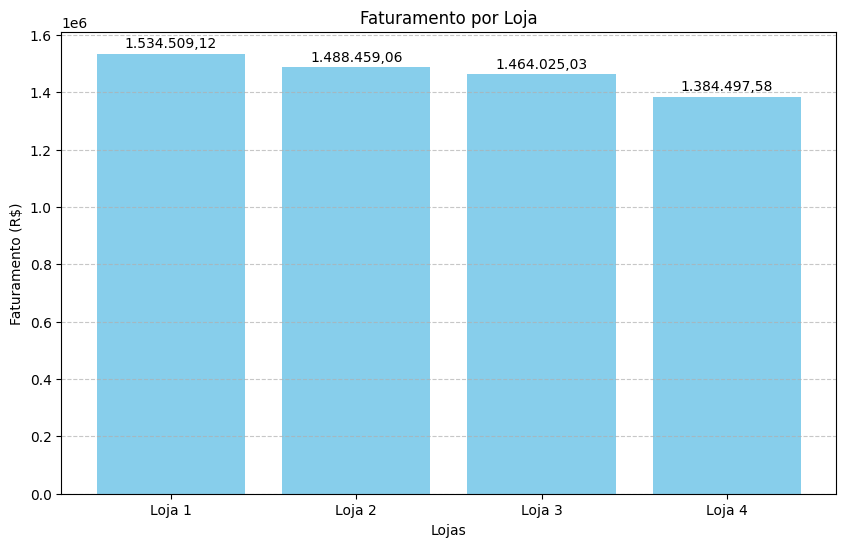

In [94]:
import matplotlib.pyplot as plt


# Convertendo as chaves do dicionário 'faturamento_lojas' em uma lista
lojas = list(faturamento_lojas.keys())  # Lista contendo os nomes das lojas

# Convertendo os valores do dicionário 'faturamento_lojas' em uma lista
faturamentos = list(faturamento_lojas.values())  # Lista contendo o faturamento de cada loja

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.bar(lojas, faturamentos, color='skyblue')  # Plota as barras # Changed faturamento_lojas to faturamentos
plt.xlabel('Lojas')  # Define o rótulo do eixo x
plt.ylabel('Faturamento (R$)')  # Define o rótulo do eixo y
plt.title('Faturamento por Loja')  # Define o título do gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade ao eixo y

# Adicionando os valores acima de cada barra
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + 10000, f'{valor:,.2f}'.replace(",", "X").replace(".", ",").replace("X", "."), ha='center', va='bottom')

plt.show()

# Produtos mais e menos vendidos

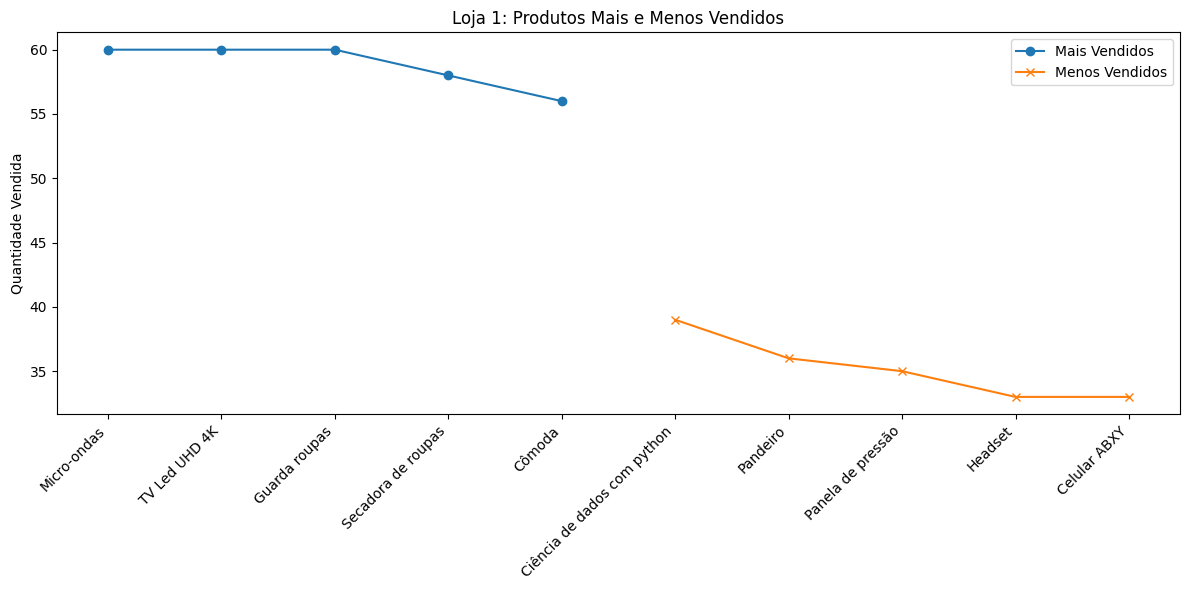

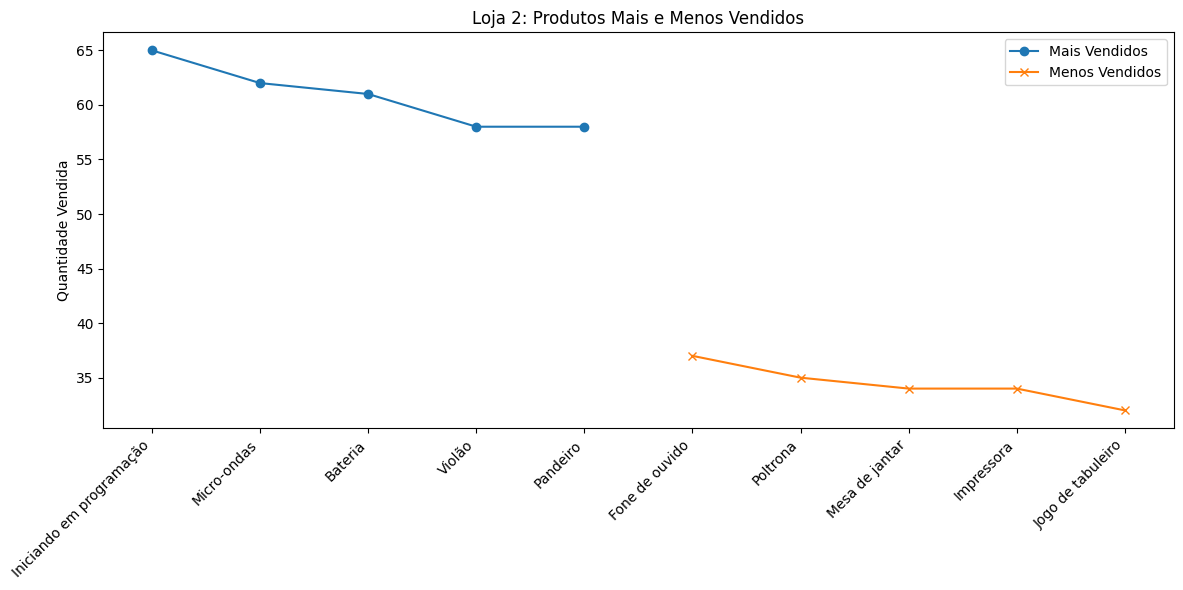

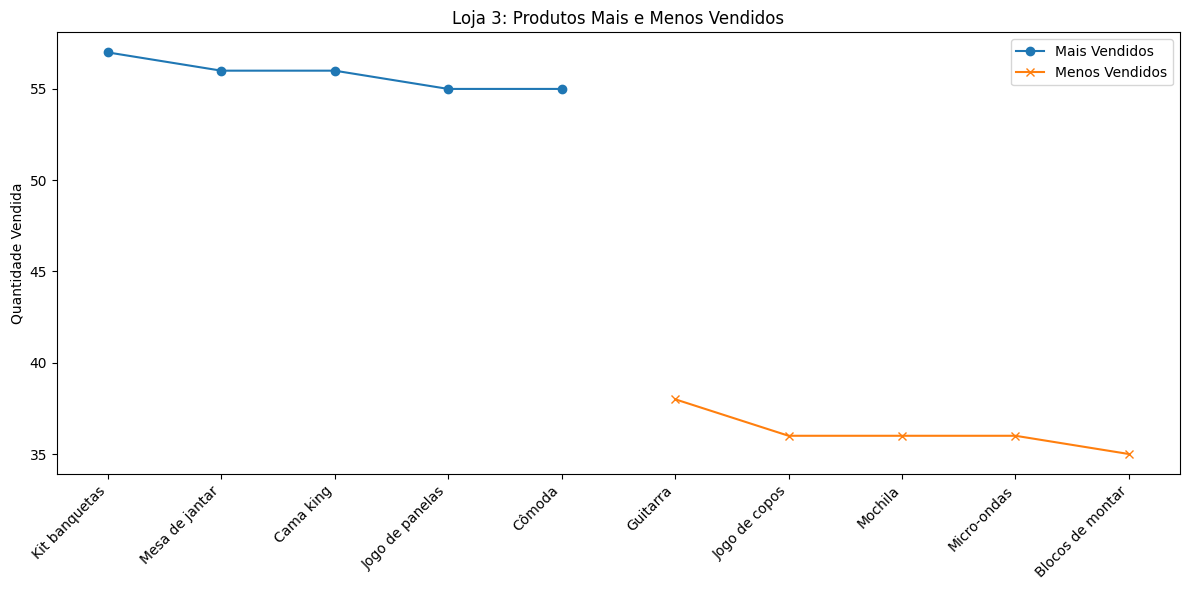

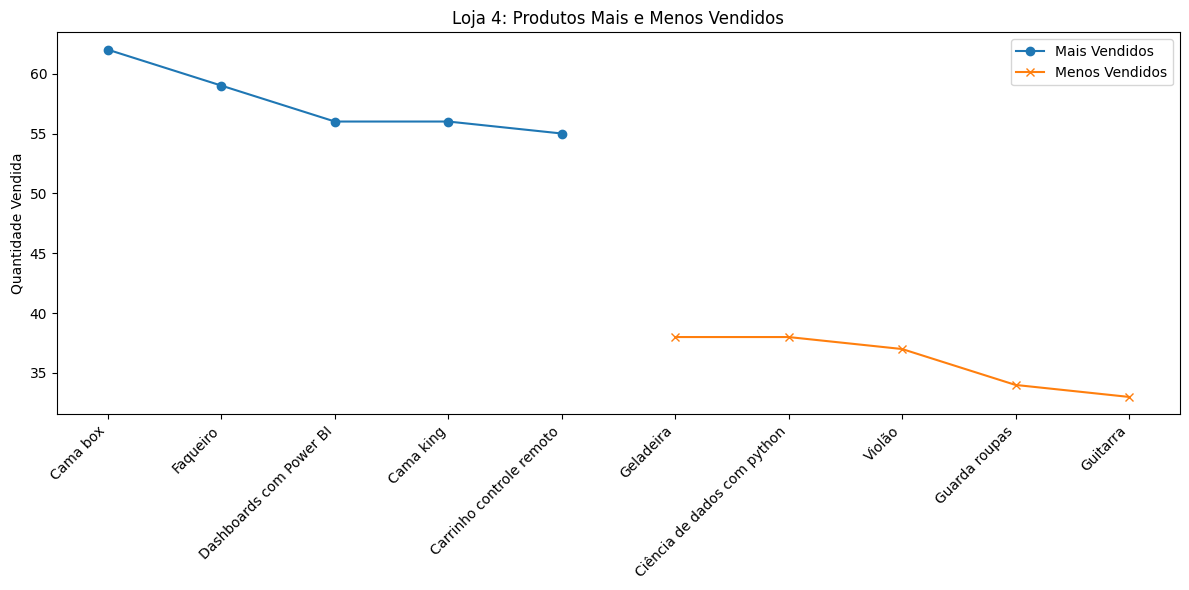

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário de URLs das lojas
urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# Gráfico de linhas para produtos mais e menos vendidos
for nome_loja, url in urls.items():
    try:
        loja = pd.read_csv(url)

        # Padronizando nomes de colunas
        loja.columns = loja.columns.str.strip()

        # Verifica o nome correto da coluna do produto
        coluna_produto = "Produto" if "Produto" in loja.columns else "Nome do Produto"
        loja = loja.dropna(subset=[coluna_produto])

        # Contando vendas por produto
        produto_contagem = loja[coluna_produto].value_counts().reset_index()
        produto_contagem.columns = [coluna_produto, "Quantidade Vendida"]

        # Seleciona os 5 mais e 5 menos vendidos
        top_5_produtos = produto_contagem.head(5)
        bottom_5_produtos = produto_contagem.tail(5)

        # Criando o gráfico de linhas
        plt.figure(figsize=(12, 6))
        plt.plot(top_5_produtos[coluna_produto], top_5_produtos["Quantidade Vendida"], marker='o', label="Mais Vendidos")
        plt.plot(bottom_5_produtos[coluna_produto], bottom_5_produtos["Quantidade Vendida"], marker='x', label="Menos Vendidos")

        plt.ylabel("Quantidade Vendida")
        plt.title(f"{nome_loja}: Produtos Mais e Menos Vendidos")
        plt.xticks(rotation=45, ha="right")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro ao processar {nome_loja}: {e}")


# Categorias mais vendidas

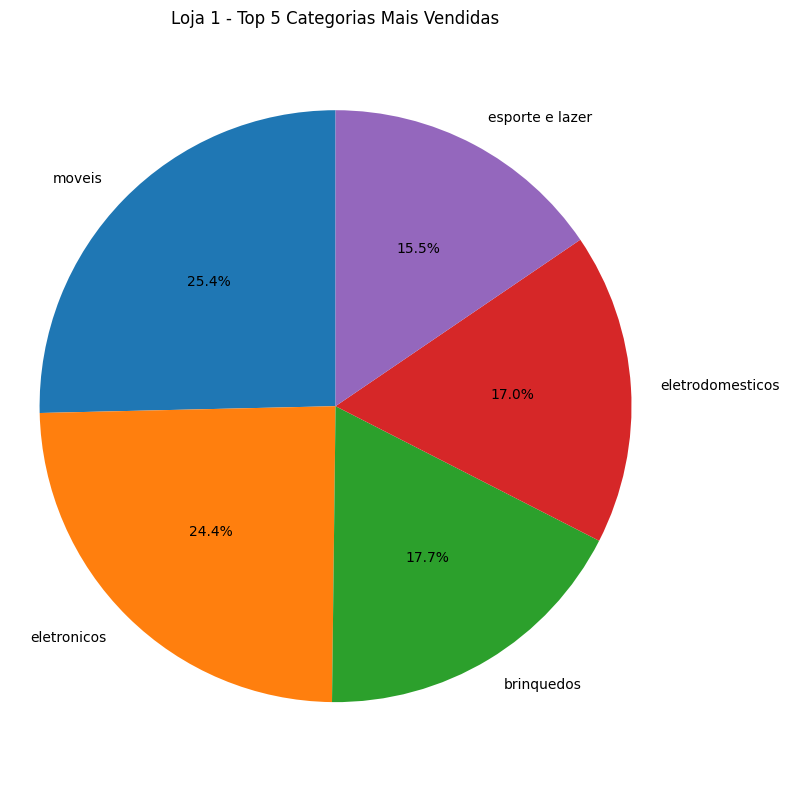

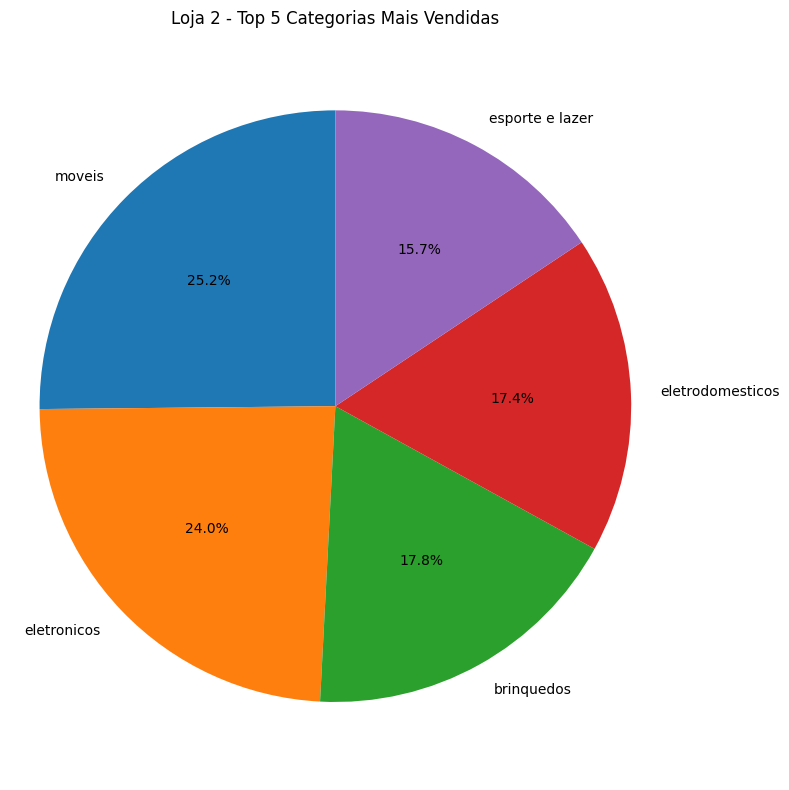

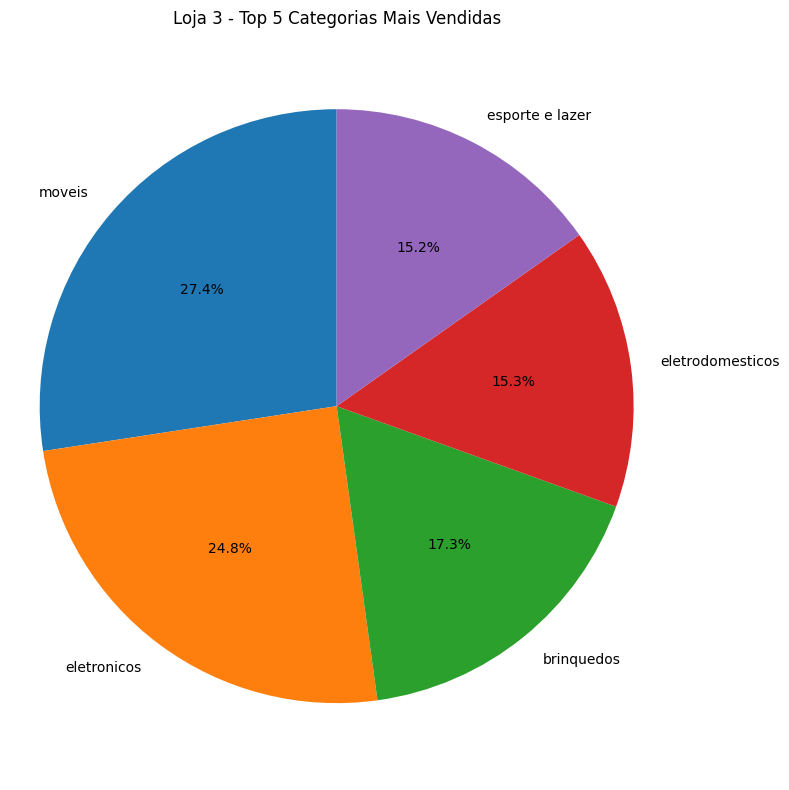

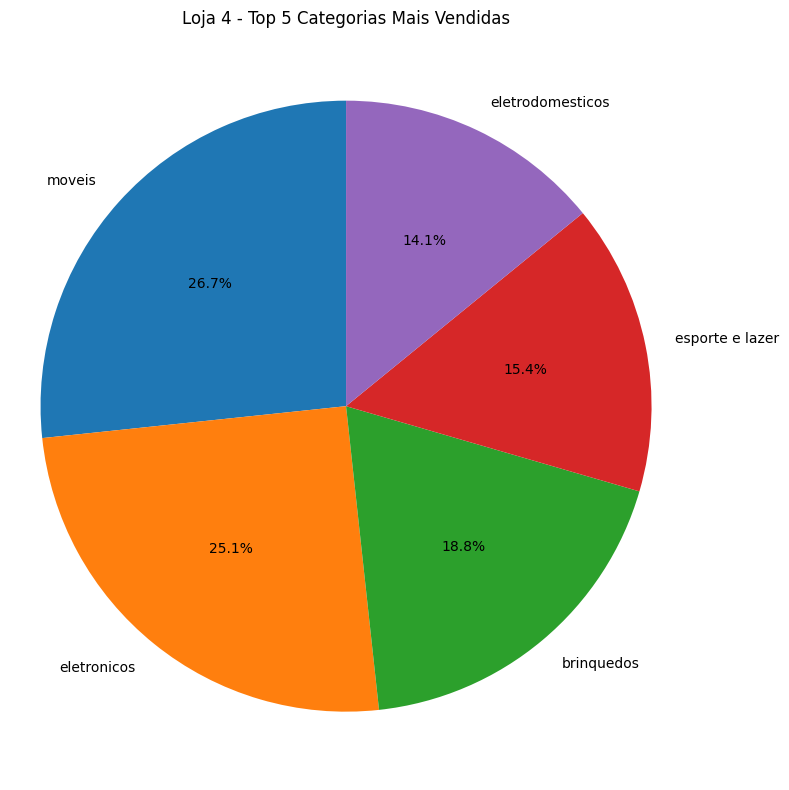

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário com os links dos arquivos CSV de cada loja

urls = {
    "Loja 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv",
    "Loja 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv",
    "Loja 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv",
    "Loja 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv",
}

# 2. Vendas por Categoria (gráfico de pizza)
for nome_loja, url in urls.items():
    try:
        loja = pd.read_csv(url)

        # Padronizando os nomes das colunas
        loja.columns = loja.columns.str.strip()

        # Verificando o nome da coluna de categoria
        coluna_categoria = "Categoria" if "Categoria" in loja.columns else "Categoria do Produto"
        loja = loja.dropna(subset=[coluna_categoria])

        # Contagem de vendas por categoria
        categoria_contagem = loja[coluna_categoria].value_counts().reset_index()
        categoria_contagem.columns = [coluna_categoria, "Quantidade Vendida"]

        # Selecionando as 5 categorias mais vendidas
        top_5_categorias = categoria_contagem.head(5)

        # Criando o gráfico de pizza
        plt.figure(figsize=(8, 8))
        plt.pie(
            top_5_categorias["Quantidade Vendida"],
            labels=top_5_categorias[coluna_categoria],
            autopct='%1.1f%%',
            startangle=90
        )
        plt.title(f'{nome_loja} - Top 5 Categorias Mais Vendidas')
        plt.axis('equal')  # Garante formato circular
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro ao processar {nome_loja}: {e}")


# Média de avaliação

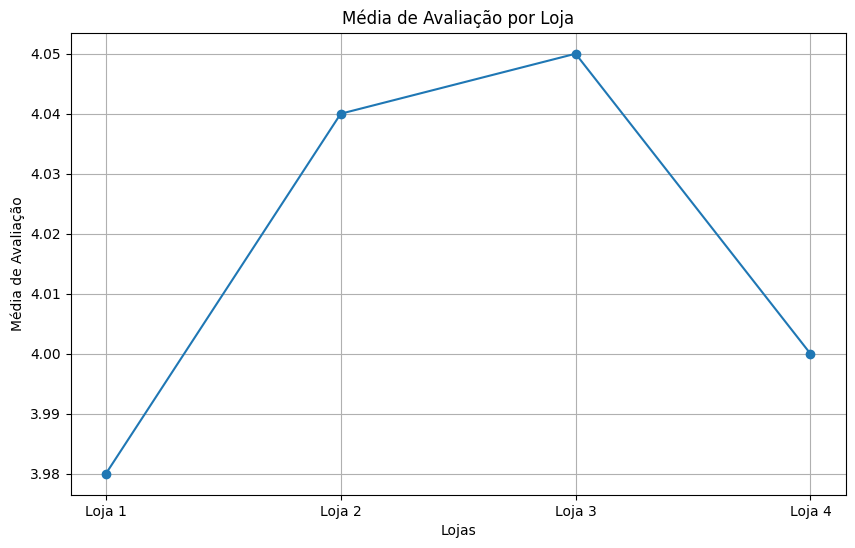

In [97]:
import matplotlib.pyplot as plt
# Criando o gráfico de linhas para a média de avaliação
plt.figure(figsize=(10, 6))
plt.plot(avaliacoes.keys(), avaliacoes.values(), marker='o', linestyle='-')
plt.xlabel("Lojas")
plt.ylabel("Média de Avaliação")
plt.title("Média de Avaliação por Loja")
plt.grid(True)
plt.show()


#**Relatório de Análise das Lojas**



#Introdução
___
O objetivo deste relatório é avaliar e comparar o desempenho de quatro lojas com base em uma série de métricas de vendas. Com base nas análises realizadas sobre o faturamento total das lojas, as categorias de produtos mais e menos vendidas, a média das avaliações dos clientes, os produtos mais e menos vendidos, e o frete médio de cada loja, este relatório visa fornecer uma recomendação sobre qual loja o Senhor João deve considerar vender, levando em conta todos os fatores analisados.

As lojas analisadas são:

1. Loja 1

2. Loja 2

3. Loja 3

4. Loja 4

O foco será identificar as forças e fraquezas de cada loja e justificar a decisão sobre qual delas deve ser vendida com base em uma análise abrangente.

#Desenvolvilmento
##1. Faturamento Total
____

O faturamento total de cada loja foi calculado a partir da soma das vendas registradas em cada uma delas. A tabela a seguir mostra o faturamento de cada loja:

| LOJA     |  VALOR (R$)  |
|----------|--------------|
|  Loja 1  | 1.534.509,12 |
|  Loja 2  | 1.488.459,06 |
|  Loja 3  | 1.464.025,03 |
|  Loja 4  | 1.384.497,58 |

Com base nos dados acima, podemos observar que a Loja 1 apresentou o maior faturamento, seguida pela Loja 2. A Loja 4, por outro lado, apresentou o menor faturamento.

##2. Média das Avaliações dos Clientes
___
A satisfação dos clientes é um indicador importante da qualidade de cada loja. A seguir, temos a média das avaliações dos clientes:

|  LOJA  |  MÉDIA  |
|--------|---------|
| Loja 1 |  3.98   |
| Loja 2 |  4.04   |
| Loja 3 |  4.05   |
| Loja 4 |  4.00   |


A Loja 3 se destaca com a maior média de avaliações, o que sugere que os clientes estão mais satisfeitos com a experiência de compra nesta loja. A Loja 2, por outro lado, apresenta a menor média, o que pode indicar problemas relacionados ao atendimento ao cliente ou à qualidade do produto.

##3. Produtos Mais e Menos Vendidos
___
Analisando os produtos mais e menos vendidos em cada loja, podemos identificar quais itens têm maior demanda e quais têm pouca aceitação.

| Loja   | Mais Vendidos             | Menos Vendidos    |
|--------|---------------------------|------------------ |
| Loja 1 | Micro-ondas               | Panela de pressão |
| Loja 2 | Iniciando em programação  | Mesa de jantar    |
| Loja 3 | Kit banquetas             | Mochila           |
| Loja 4 | Cama box                  | Violão            |

Essas informações indicam quais lojas estão acertando na escolha de produtos populares e quais estão com itens com baixo desempenho. Vender produtos populares pode garantir maior lucratividade e crescimento.

##4.0 Frete Médio
___
O custo do frete é um fator importante para os consumidores ao decidirem comprar de uma loja. A seguir, temos o valor médio do frete de cada loja:

|  LOJA  | VALOR |
|--------|-------|
| Loja 1 | 34.69 |
| Loja 2 | 33.62 |
| Loja 3 | 33.07 |
| Loja 4 | 31.28 |


#Conclusão e Recomendação
___

Com base na análise detalhada dos dados, podemos avaliar qual loja o Senhor João deveria considerar vender, levando em conta fatores como faturamento total, avaliação dos clientes, produtos mais e menos vendidos e frete médio.
A Loja 4 se destaca como a opção mais viável para ser vendida. Aqui estão as razões que sustentam essa recomendação:
- Menor faturamento total: A Loja 4 tem o menor faturamento entre todas as lojas, indicando que seu desempenho financeiro é inferior em comparação com as demais.

- Avaliação dos clientes: Embora sua média de avaliação (4.00) não seja a pior, ela também não é a melhor. A Loja 3, por exemplo, possui uma avaliação ligeiramente superior (4.05), o que mostra que a experiência dos clientes pode ser mais satisfatória em outras lojas.

- Produtos vendidos: Os produtos mais vendidos na Loja 4 (Cama box) podem ter menor rotatividade e os menos vendidos (Violão) indicam baixa demanda. Esse fator pode limitar o crescimento da loja a longo prazo.

- Frete médio: Apesar do frete da Loja 4 ser o mais competitivo, ele não compensa os outros fatores negativos que impactam a loja.

Dessa forma, a **Loja 4** parece ser a menos lucrativa e competitiva dentre as
opções, tornando-se a melhor escolha para venda. A liquidação dessa loja permitirá ao Senhor João concentrar esforços nas demais, otimizando recursos e fortalecendo o desempenho geral do negócio.




In [98]:
!python --version

Python 3.11.12
